In [23]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import warnings
import xgboost as xgb
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('/Users/joaosequeira/sao_paulo_apartments/sao_paulo_apartments/dados_wgs.xlsx')
df


In [5]:
treated_df = df[['valor_total', 'unit', 'area_util', 'quartos', 'vagas',
       'condominio', 'suites', 'banheiros', 'piscina', 'academia', 'quadra',
       'media_idh', 'media_gini', 'expectativa_vida', 'renda_percapita',
        'dist', 'lat', 'lon']]

treated_df.isnull().sum()

valor_total           0
unit                  0
area_util             0
quartos               0
vagas                 0
condominio          235
suites                0
banheiros             0
piscina               0
academia              0
quadra                0
media_idh             0
media_gini            0
expectativa_vida      0
renda_percapita       0
dist                  0
lat                   0
lon                   0
dtype: int64

In [6]:
treated_df = treated_df.fillna(0)

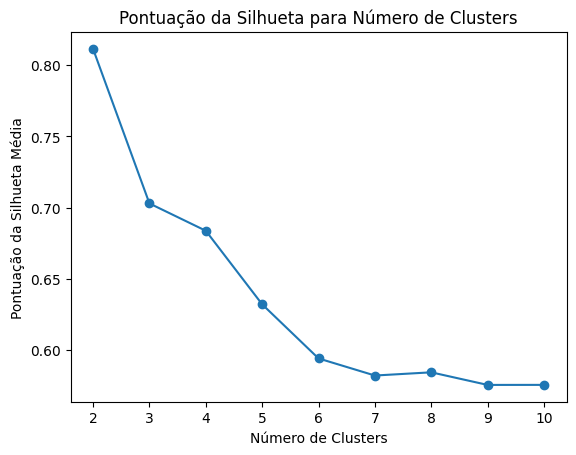

In [22]:
# Definir uma lista de número de clusters para testar
num_clusters = range(2, 11)

# Lista para armazenar os valores de silhueta média para cada número de clusters
silhouette_scores = []

# Executar o K-means para cada número de clusters e calcular a silhueta
for num in num_clusters:
    kmeans = KMeans(n_clusters=num, random_state=42)
    cluster_labels = kmeans.fit_predict(treated_df)
    silhouette_avg = silhouette_score(treated_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotar o gráfico de silhueta
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Pontuação da Silhueta Média')
plt.title('Pontuação da Silhueta para Número de Clusters')
plt.show()

In [18]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=2, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(treated_df)

#view cluster assignments for each observation
treated_df['cluster'] = kmeans.labels_


In [19]:
# Criar o boxplot com o Plotly
fig = px.box(df, x=treated_df['cluster'], y=treated_df['media_idh'])

# Exibir o gráfico
fig.show()

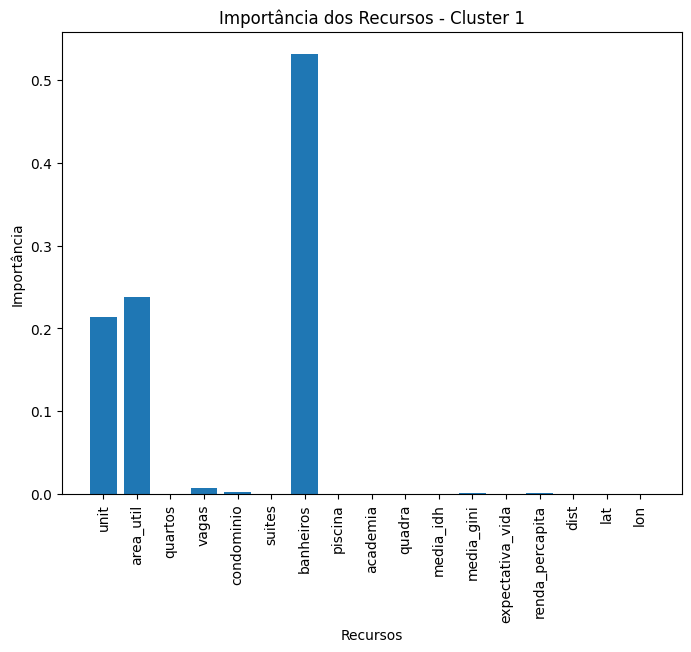

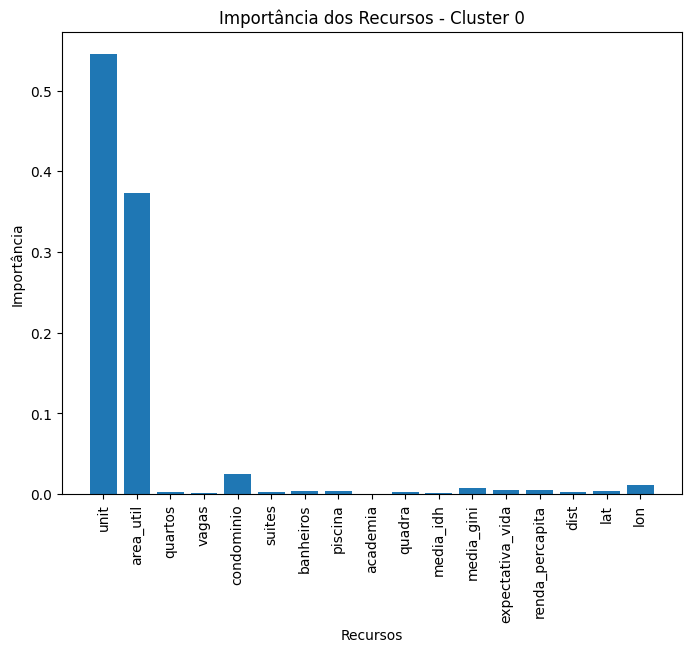

In [24]:
# Separar os dados por cluster
clusters = treated_df['cluster'].unique()

# Executar a análise de importância de recursos para cada cluster
for cluster in clusters:
    # Filtrar os dados para o cluster atual
    cluster_data = treated_df[treated_df['cluster'] == cluster]
    
    # Definir as variáveis independentes e dependentes
    X = cluster_data.drop(['valor_total', 'cluster'], axis=1)
    y = cluster_data['valor_total']
    
    # Criar o modelo XGBoost
    model = xgb.XGBRegressor()
    
    # Treinar o modelo
    model.fit(X, y)
    
    # Obter a importância dos recursos
    feature_importance = model.feature_importances_
    feature_names = X.columns
    
    # Plotar a importância dos recursos
    plt.figure(figsize=(8, 6))
    plt.bar(feature_names, feature_importance)
    plt.title(f'Importância dos Recursos - Cluster {cluster}')
    plt.xlabel('Recursos')
    plt.ylabel('Importância')
    plt.xticks(rotation=90)
    plt.show()